In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("processed_kelulusan.csv")

X = df.drop("Lulus", axis=1)
y = df["Lulus"]

sc = StandardScaler()
Xs = sc.fit_transform(X)

#Split menjadi train (60%), val (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(
    Xs, y, test_size=0.4, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Ukuran data:")
print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)

print("\nDistribusi kelas:")
print("Train:\n", y_train.value_counts())
print("Val:\n", y_val.value_counts())
print("Test:\n", y_test.value_counts())


Ukuran data:
Train : (6, 5)
Val   : (2, 5)
Test  : (2, 5)

Distribusi kelas:
Train:
 Lulus
1    3
0    3
Name: count, dtype: int64
Val:
 Lulus
1    1
0    1
Name: count, dtype: int64
Test:
 Lulus
1    1
0    1
Name: count, dtype: int64


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # klasifikasi biner
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy", "AUC"])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
es = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100, batch_size=32,
    callbacks=[es], verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - AUC: 0.2222 - accuracy: 0.5000 - loss: 0.7390 - val_AUC: 0.5000 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step - AUC: 0.5556 - accuracy: 0.6667 - loss: 0.6825 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6804
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - AUC: 1.0000 - accuracy: 0.8333 - loss: 0.6342 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6654
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - AUC: 0.5556 - accuracy: 0.6667 - loss: 0.6751 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6513
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - AUC: 0.4444 - accuracy: 0.5000 - loss: 0.7027 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6376
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.5859 - val_AUC: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6240
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/s

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print("Test Acc:", acc, "AUC:", auc)

y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

Test Acc: 1.0 AUC: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         1
           1      1.000     1.000     1.000         1

    accuracy                          1.000         2
   macro avg      1.000     1.000     1.000         2
weighted avg      1.000     1.000     1.000         2



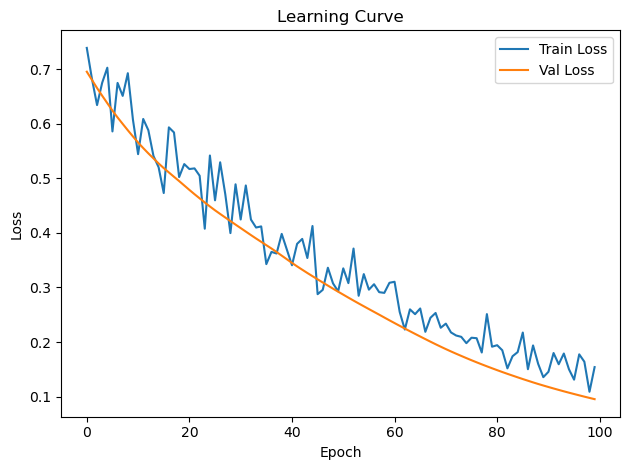

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.title("Learning Curve")
plt.tight_layout(); plt.savefig("learning_curve.png", dpi=120)

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

# --- 1. Buat data dummy ---
X, y = make_classification(n_samples=2000, n_features=20, n_informative=10, n_classes=2, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- 2. Fungsi membuat model ---
def build_model(n_neurons=64, optimizer_name="adam", use_batchnorm=False, dropout_rate=0.3, l2_lambda=0.001):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    model.add(layers.Dense(n_neurons, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    if use_batchnorm:
        model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(1, activation='sigmoid'))

    if optimizer_name == "adam":
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    else:  # sgd
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- 3. Fungsi train dan evaluasi ---
def train_and_eval(params):
    model = build_model(**params)
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train, 
        validation_data=(X_val, y_val),
        epochs=50, batch_size=32, verbose=0,
        callbacks=[early_stop]
    )
    
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    y_pred_proba = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    return {"acc": acc, "f1": f1, "auc": auc}

# --- 4. Grid eksperimen ---
grid = [
    {"n_neurons": 32, "optimizer_name": "adam", "use_batchnorm": False},
    {"n_neurons": 64, "optimizer_name": "adam", "use_batchnorm": False},
    {"n_neurons": 128, "optimizer_name": "adam", "use_batchnorm": False},
    {"n_neurons": 64, "optimizer_name": "sgd", "use_batchnorm": False},
    {"n_neurons": 64, "optimizer_name": "adam", "use_batchnorm": True},
]

# --- 5. Jalankan eksperimen ---
for params in grid:
    print(f"\n🔹 Eksperimen: Neuron={params['n_neurons']}, Optimizer={params['optimizer_name']}, BatchNorm={params['use_batchnorm']}")
    res = train_and_eval(params)
    print(f"   Akurasi={res['acc']:.4f} | F1={res['f1']:.4f} | AUC={res['auc']:.4f}")




🔹 Eksperimen: Neuron=32, Optimizer=adam, BatchNorm=False
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
   Akurasi=0.9167 | F1=0.9169 | AUC=0.9683

🔹 Eksperimen: Neuron=64, Optimizer=adam, BatchNorm=False
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
   Akurasi=0.9267 | F1=0.9257 | AUC=0.9734

🔹 Eksperimen: Neuron=128, Optimizer=adam, BatchNorm=False
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
   Akurasi=0.9300 | F1=0.9298 | AUC=0.9705

🔹 Eksperimen: Neuron=64, Optimizer=sgd, BatchNorm=False
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
   Akurasi=0.9300 | F1=0.9298 | AUC=0.9750

🔹 Eksperimen: Neuron=64, Optimizer=adam, BatchNorm=True
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
   Akurasi=0.9333 | F1=0.9329 | AUC=0.9719
